In [1]:
#import dependencies 
import pandas as pd

In [2]:
#read csv
df = pd.read_csv('Raw_Data/data_arrhythmia.csv',delimiter = ';')
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [3]:
#Pull variables of interest
new_df = df[['age','sex','height','weight','qrs_duration','p-r_interval','q-t_interval','t_interval','p_interval','qrs','heart_rate','diagnosis']]
new_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8
1,56,1,165,64,81,174,401,149,39,25,53,6
2,54,0,172,95,138,163,386,185,102,96,75,10
3,55,0,175,94,100,202,380,179,143,28,71,1
4,75,0,190,80,88,181,360,177,103,-16,?,7


In [4]:
#Find any null variables
new_df.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
heart_rate      0
diagnosis       0
dtype: int64

In [5]:
#Arrhythmia = 1
new_df['diagnosis'].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

In [6]:
# number of heart arrhythmias not of interest
sum(df['diagnosis']!=1)

207

In [7]:
# Number of Arrhythmia of interest
sum(df['diagnosis']==1)

245

In [8]:
#Set arrhythmia of interest = 1
dummy_df = new_df.join(pd.get_dummies(new_df['diagnosis']==1))
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,False,True
0,75,0,190,80,91,193,371,174,121,-16,63,8,1,0
1,56,1,165,64,81,174,401,149,39,25,53,6,1,0
2,54,0,172,95,138,163,386,185,102,96,75,10,1,0
3,55,0,175,94,100,202,380,179,143,28,71,1,0,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,1,0


In [9]:
#drop false column
dummy_df.drop(columns=[False],axis=1,inplace=True)
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,True
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,0


In [10]:
#Rename True column to Arrhythmia diagnosis
dummy_df.rename(columns={True:'arr_diagnosis'},inplace=True)

In [11]:
#heart_rate column had string '?', this will remove the string
replaced = dummy_df.replace(['?'],0)

In [12]:
replaced.dtypes

age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
p-r_interval      int64
q-t_interval      int64
t_interval        int64
p_interval        int64
qrs               int64
heart_rate       object
diagnosis         int64
arr_diagnosis     uint8
dtype: object

In [13]:
#change all columns to integer
replaced_df = replaced.astype(int)
replaced_df.dtypes

age              int64
sex              int64
height           int64
weight           int64
qrs_duration     int64
p-r_interval     int64
q-t_interval     int64
t_interval       int64
p_interval       int64
qrs              int64
heart_rate       int64
diagnosis        int64
arr_diagnosis    int64
dtype: object

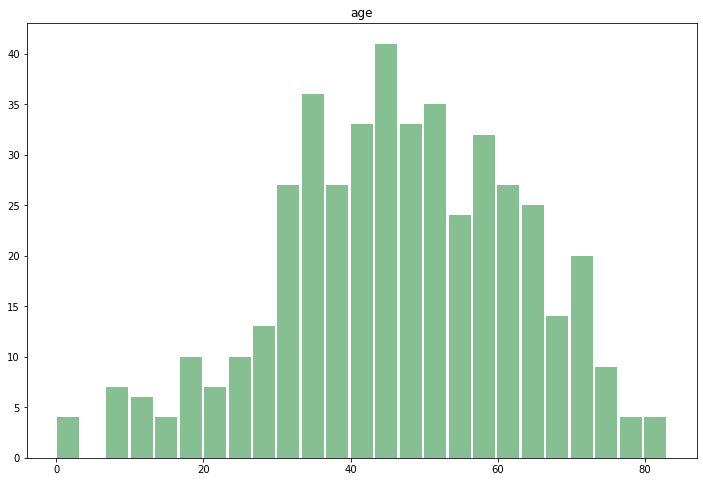

In [14]:
#Distribution of age
ax = replaced_df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

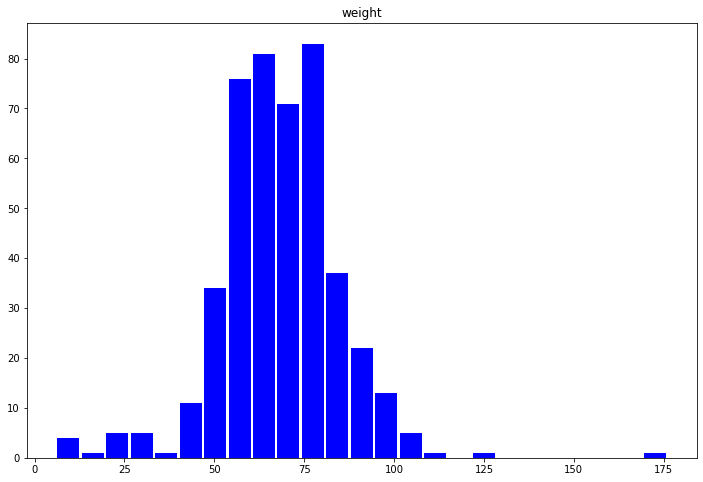

In [15]:
#Distribution of weight
ax = replaced_df.hist(column='weight', bins=25, grid=False, figsize=(12,8), color='blue', zorder=2, rwidth=0.9)

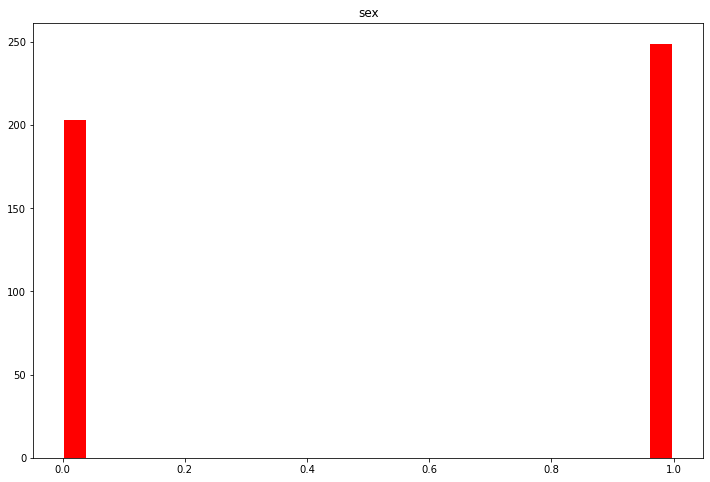

In [16]:
#Distribution of Sex
#Male = 0
#Female = 1
ax = replaced_df.hist(column='sex', bins=25, grid=False, figsize=(12,8), color='red', zorder=2, rwidth=0.9)

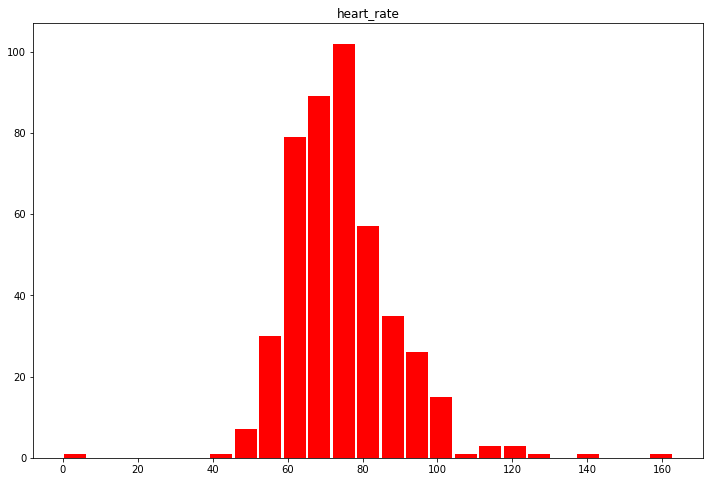

In [17]:
#Distribution of heart rate
ax = replaced_df.hist(column='heart_rate', bins=25, grid=False, figsize=(12,8), color='red', zorder=2, rwidth=0.9)

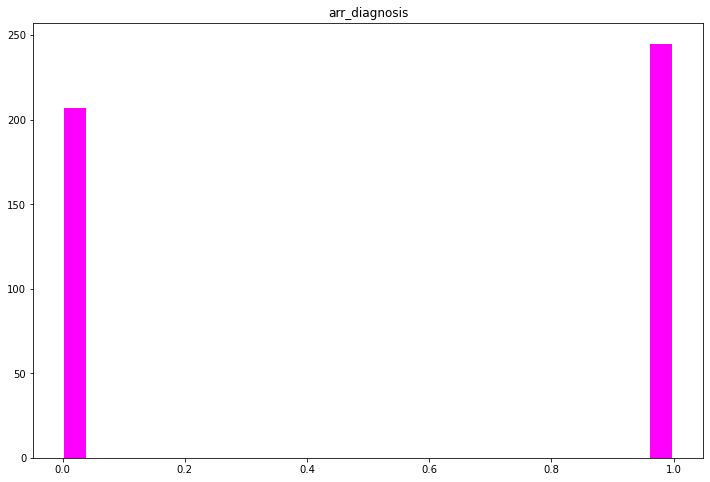

In [18]:
#Distribution of diagnosis of interest
ax = replaced_df.hist(column='arr_diagnosis', bins=25, grid=False, figsize=(12,8), color='magenta', zorder=2, rwidth=0.9)

In [19]:
# export replaced_df as csv
replaced_df.to_csv("clean_data.csv", index=False)